# Query for Spectraction Results in OGA

 work with Weakly_2023_11
- use jupyter kernel LSST
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/03/30
- last update : 2023/04/07

- Spectractor https://github.com/lsst/Spectractor/
- Spectractor Version 2.4
- branch lsst-dev
- available in version w_2023_11 by default


In [1]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/home/d/dagoret/repos/repos_w_2023_11/atmospec 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-5.1.0/eups 	setup


In [2]:
! eups list -s lsst_distrib

   gdf42428520+c82c1836b5 	current w_2023_11 setup


In [3]:
import h5py

In [4]:
import lsst.daf.butler as dafButler
#import lsst.summit.utils.butlerUtils as butlerUtils

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [6]:
import pickle

In [7]:
from astropy.time import Time
import astropy.units as u

## Config

In [8]:
FLAG_MOUNT_ERRORS= True

### Butler

In [9]:
#repo =  "/sdf/group/rubin/repo/main"
#repo = "/sdf/group/rubin/repo/oga/"
repo = "/repo/embargo/"
butler = dafButler.Butler(repo)
registry = butler.registry

### Date & Filter & Disperser & collection

- make your choice

In [1]:
DateToRuncollection = {
    
 # september 2022
 20220912 :  "u/dagoret/BPS_manyspectro_v60", # Missing collection
 20220913 :  "u/dagoret/BPS_manyspectro_v61", # Missing collection
 20220914 :  "u/dagoret/BPS_manyspectro_v62", # Missing collection  
    
 20220927 :  "u/dagoret/BPS_manyspectro_v63", # Mount errors available, mitigé
 20220928 :  "u/dagoret/BPS_manyspectro_v64", # Mount errors available, very nice spectra
 20220929 :  "u/dagoret/BPS_manyspectro_v65", # Mount errors available, very nice spectra
    
    
 # october 2022
 20221012 :  "u/dagoret/BPS_manyspectro_v56", # mount errors , nice, all good
 20221025 :  "u/dagoret/BPS_manyspectro_v57", # mount errors, very very bad spectra, run not selected
 20221026 :  "u/dagoret/BPS_manyspectro_v58", # mount errors,  very nice spectra, all good
 20221027 :  "u/dagoret/BPS_manyspectro_v59", # mount errors,  nice spectra, all good
    
 # november 2022
 20221109 :  "u/dagoret/BPS_manyspectro_v53", # mount errors, nice spectra, few bad labelled as good 
 20221110 :  "u/dagoret/BPS_manyspectro_v54", # mount errors available, many bad rec spectra, few bad labelled as good, versy strange
 20221123 :  "u/dagoret/BPS_manyspectro_v55", # mount errors , nice   
    
 # december 2022   
 20221207 :  "u/dagoret/BPS_manyspectro_v48", # No mount error, nice spectra
 20221208 :  "u/dagoret/BPS_manyspectro_v49", # No mount error, nice spectra, one bad labelled as good
 20221209 :  "u/dagoret/BPS_manyspectro_v50", # No mount error, spectra at distance from optical center, very interesting
 20221210 :  "u/dagoret/BPS_manyspectro_v51", # No mount error, bof
 20221212 :  "u/dagoret/BPS_manyspectro_v52", # No mount error, very bad gains and instability 
    
 #January 2023 
 20230117 :  "u/dagoret/BPS_manyspectro_v79", # no mount errors, some mucol spectra that looks good are rejected on DCCD
 20230118 :  "u/dagoret/BPS_manyspectro_v80", # no mount error, some mucol looking good are rejected, many bad centroid calculation
 20230119 :  "u/dagoret/BPS_manyspectro_v77", # no mount errors, many blurred spectra probably due to strong tracking error
 20230131 :  "u/dagoret/BPS_manyspectro_v78", # missing for moment

 #february 2023
 20230214 :  "u/dagoret/BPS_manyspectro_v42", # no mount errors, nothing special
 20230215 :  "u/dagoret/BPS_manyspectro_v43", # mount errors, OK
 20230216 :  "u/dagoret/BPS_manyspectro_v44", # mount errors, OK, nice spectra 
 20230228 :  "u/dagoret/BPS_manyspectro_v70", # No mount error,OK nice spectra
    
 #march 2023  
 20230301 :  "u/dagoret/BPS_manyspectro_v71", # no mount errors, OK many spectra
 20230302 :  "u/dagoret/BPS_manyspectro_v72", # no mount error, sometime bad subtraction of order2 on HD38666 (mucol) 
 20230315 :  "u/dagoret/BPS_manyspectro_v73", # mount errors
 20230316 :  "u/dagoret/BPS_manyspectro_v74", # mount errors   
    
}

In [11]:
DATE = 20220927
my_collection = DateToRuncollection[DATE]

filterdispersername = "empty~holo4_003"

RUNSELECTION = 20230330
#RUNSELECTION = 20230403

# List of Dataset types avalaible in my collection

## List of dataset types

In [12]:
list(registry.queryDatasetTypes("*spec*"))

[DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict),
 DatasetType('spectraction', {band, instrument, detector, physical_filter, visit}, Spectraction),
 DatasetType('spectractorImage', {band, instrument, detector, physical_filter, visit}, SpectractorImage),
 DatasetType('spectractorSpectrum', {band, instrument, detector, physical_filter, visit}, SpectractorSpectrum)]

## list of datasets

In [13]:
list(registry.queryDatasets("*spec*", collections=[my_collection]))[:10]

[DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2022092700643, ...}, id=9d3ec7f4-49e0-49a5-875a-07f31b0b22bc, run='u/dagoret/BPS_manyspectro_v63/20230313T160635Z'),
 DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2022092700707, ...}, id=b67ffd03-2889-45a1-9c95-ed85e1704ac9, run='u/dagoret/BPS_manyspectro_v63/20230313T160635Z'),
 DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2022092700633, ...}, id=bb3ce18c-adf9-4ecf-b5f2-2451d8b2e1c4, run='u/dagoret/BPS_manyspectro_v63/20230313T160635Z'),
 DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2

### Spectractor

In [14]:
configmode = "PSF2DFFM_REBIN2"
#configmode = "PSF2DFFM_REBIN1"
#ext="_b"
specver="specV2.4"

https://www.pythonforthelab.com/blog/how-to-use-hdf5-files-in-python/

In [15]:
#summary_file = f"summaryspectra_{DATE}-{filterdispersername}-{configmode}-oga.csv"
summary_file = f"summaryspectra_{DATE}-{filterdispersername}-{configmode}-{specver}-oga.csv"
output_file_h5 = f"allspectra_{DATE}-{filterdispersername}-{configmode}-{specver}-oga.hdf5"

### The collection

In [16]:
datasetRefs = registry.queryDatasets(datasetType='spectractorSpectrum', collections=my_collection, where= "instrument='LATISS'")

In [17]:
# following line not possible in OGA
#butler = butlerUtils.makeDefaultLatissButler(extraCollections=[my_collection])

In [18]:
if FLAG_MOUNT_ERRORS:
    df_mounterrors = pd.read_csv("mountErrors.csv")
    df=df_mounterrors[df_mounterrors["date_obs"] == DATE ]
    if len(df) == 0:
        FLAG_MOUNT_ERRORS = False
        

In [19]:
df_mounterrors

Unnamed: 0    idx  date_obs  seq       exposure  status    az_rms  \
0             437    437  20220908   66  2022090800066    True  0.040777   
1             444    444  20220908   73  2022090800073    True  0.011192   
2             447    447  20220912    3  2022091200003    True  0.006601   
3             516    516  20220912   72  2022091200072    True  0.004987   
4             522    522  20220912   78  2022091200078    True  0.098272   
...           ...    ...       ...  ...            ...     ...       ...   
16645       43253  43253  20230321   43  2023032100043    True  0.010867   
16646       43254  43254  20230321   44  2023032100044    True  0.010794   
16647       43255  43255  20230321   45  2023032100045    True  0.023044   
16648       43256  43256  20230321   46  2023032100046    True  0.265174   
16649       43262  43262  20230321   52  2023032100052    True  0.214062   

         el_rms   rot_rms  image_az_rms  image_el_rms  image_rot_rms  
0      0.026023  0.291703      0.020020      0.026023       0.000396  
1      0.007489  0.614963      0.005322      0.007489       0.000835  
2      0.005453  0.706174      0.005130      0.005453       0.000959  
3      0.004895  0.159655      0.003876      0.004895       0.000217  
4      0.052172  0.148901      0.048586      0.052172       0.000202  
...         ...       ...           ...           ...            ...  
16645  0.011750  0.004012      0.009384      0.011750       0.000005  
16646  0.007538  0.007706      0.009318      0.007538       0.000010  
16647  0.014788  0.300176      0.019884      0.014788       0.000407  
16648  0.060447  0.004043      0.246965      0.060447       0.000005  
16649  0.049427  0.007835      0.198238      0.049427       0.000011  

[16650 rows x 12 columns]

In [20]:
df

Unnamed: 0   idx  date_obs  seq       exposure  status    az_rms  \
2246        3579  3579  20220927    3  2022092700003    True  0.014379   
2247        3580  3580  20220927    4  2022092700004    True  0.037309   
2248        3745  3745  20220927  169  2022092700169    True  0.070808   
2249        3776  3776  20220927  200  2022092700200    True  0.113386   
2250        3777  3777  20220927  201  2022092700201    True  0.124199   
...          ...   ...       ...  ...            ...     ...       ...   
2823        4355  4355  20220927  779  2022092700779    True  0.043040   
2824        4356  4356  20220927  780  2022092700780    True  0.028985   
2825        4357  4357  20220927  781  2022092700781    True  0.030522   
2826        4358  4358  20220927  782  2022092700782    True  0.039736   
2827        4359  4359  20220927  783  2022092700783    True  0.036899   

        el_rms   rot_rms  image_az_rms  image_el_rms  image_rot_rms  
2246  0.011619  0.780204      0.010081      0.011619       0.001059  
2247  0.005398  2.704247      0.006435      0.005398       0.003671  
2248  0.018494  0.716787      0.050307      0.018494       0.000973  
2249  0.013064  0.129640      0.056591      0.013064       0.000176  
2250  0.024568  0.267857      0.061986      0.024568       0.000364  
...        ...       ...           ...           ...            ...  
2823  0.022247  0.150410      0.025986      0.022247       0.000204  
2824  0.020350  0.564654      0.017692      0.020350       0.000767  
2825  0.018321  0.115024      0.018616      0.018321       0.000156  
2826  0.022706  0.125238      0.024173      0.022706       0.000170  
2827  0.032804  0.101130      0.022420      0.032804       0.000137  

[582 rows x 12 columns]

In [21]:
FLAG_MOUNT_ERRORS 

True

## Loop on exposures

In [22]:
#outfile.close()

In [23]:
all_dataId = []     # full data id
all_spec = []       # spectra
all_exposures = []  # exposure number
all_num = []        # sequence numbers
all_h5group = []

hf_outfile =  h5py.File(output_file_h5, 'w') 
  

for i, ref in enumerate(datasetRefs):

    print(f"============= ({i}) ============datasetType = spectraction ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    
    #through old runs
    date_of_run = int(ref.run.split("/")[-1].split("T")[0])
    if date_of_run< RUNSELECTION :
        continue
 
    
    
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    
    the_exposure_key = str(the_exposure)
    
    if the_exposure not in all_exposures:
        g = hf_outfile.create_group(the_exposure_key)
        all_h5group.append(g) 
    else:
        print(f">>>>>>  already existing key {the_exposure_key} Skip it !!! ")
        the_exposure_key = the_exposure_key + "_b"
        continue
   
    
    # retrieve the spectrum from Butler
    #spec       = butler.get('spectraction',the_dataId)
    spec = butler.get('spectractorSpectrum', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    
    # save in collection lists
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_spec.append(spec)
    all_num.append(the_seq_num)
    

============= (0) ============datasetType = spectraction ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2022092700668}
visit...................: 2022092700668
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/BPS_manyspectro_v63/20230313T160635Z
============= (1) ============datasetType = spectraction ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2022092700746}
visit...................: 2022092700746
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/BPS_manyspectro_v63/20230313T160635Z
============= (2) ============datasetType = spectraction ============================================
fullId..................: {band: 'white', instrume

In [24]:
hf_outfile.keys()

<KeysViewHDF5 ['2022092700534', '2022092700535', '2022092700546', '2022092700547', '2022092700557', '2022092700558', '2022092700568', '2022092700569', '2022092700579', '2022092700580', '2022092700591', '2022092700632', '2022092700633', '2022092700643', '2022092700644', '2022092700657', '2022092700658', '2022092700668', '2022092700669', '2022092700679', '2022092700680', '2022092700695', '2022092700696', '2022092700706', '2022092700707', '2022092700723', '2022092700724', '2022092700734', '2022092700735', '2022092700745', '2022092700746', '2022092700756', '2022092700757', '2022092700767', '2022092700768', '2022092700778', '2022092700779']>

In [25]:
index = 0

spec = all_spec[index]

In [26]:
the_h5group = all_h5group[index] 

In [27]:
d = the_h5group.create_dataset('airmass', data=spec.airmass)

In [28]:
spec.airmass

2.05258177950112

In [29]:
spec.date_obs

'2022-09-28T08:45:13.622001236Z'

In [30]:
spec.cov_matrix.shape

(1136, 1136)

In [31]:
spec.lambdas.shape

(1136,)

In [32]:
spec.data_next_order.shape

(1136,)

In [33]:
spec.chromatic_psf.load_table()

In [34]:
spec.spectrogram_saturation

22666.66666666667

In [35]:
spec.chromatic_psf.plot_summary()

In [36]:
def DumpSpectrum(spec):
    print("--------------------------------------------")
    print("spec.target.label\t",spec.target.label)
    print("spec.filter_label\t",spec.filter_label)
    print("spec.airmass\t",spec.airmass)
    print("spec.date_obs\t",spec.date_obs)
    print("spec.temperature\t",spec.temperature)
    print("spec.pressure\t",spec.pressure)
    print("spec.humidity\t",spec.humidity)    
    #print("spec.ra\t",spec.ra)
    print("spec.dec\t",spec.dec)
    print("spec.hour_angle\t",spec.hour_angle)
    print("spec.parallactic_angle\t",spec.parallactic_angle)
    print("spec.camera_angle\t", spec.camera_angle)
    print("--------------------------------------------")
    print("spec.order\t",spec.order)
    print("spec.lambdas\t",spec.lambdas)
    print("spec.data\t",spec.data)
    print("spec.err\t",spec.err)
    print("spec.covmatrix\t",spec.cov_matrix)
    print("--------------------------------------------")
    print("spec.data_next_order\t",spec.data_next_order)
    print("spec.err_next_order\t",spec.err_next_order)

In [37]:
def AddDataSetsInGroup(spec,h5group):
  
   
    #spectrum

    h5group.attrs['spec_target_label'] = spec.target.label
    h5group.attrs['spec_filter_label'] = spec.filter_label
    h5group.attrs["spec_date_obs"] = spec.date_obs
    h5group.attrs["spec_airmass"] = spec.airmass 
    h5group.attrs["spec_temperature"] = spec.temperature
    h5group.attrs["spec_pressure"] = spec.pressure
    h5group.attrs["spec_humidity"] = spec.humidity
    h5group.attrs["spec_dec"] = spec.dec
    h5group.attrs["spec_hour_angle"] = spec.hour_angle
    h5group.attrs["spec_parallactic_angle"] = spec.parallactic_angle
    h5group.attrs["spec_camera_angle"] = spec.camera_angle
    h5group.attrs["spec_order"] = spec.order
    
    
    d = h5group.create_dataset("spec_lambdas",data=spec.lambdas,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_data",data=spec.data,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_err",data=spec.err,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_covmatrix",data=spec.cov_matrix,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_data_next_order",data=spec.data_next_order,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_err_next_order",data=spec.err_next_order,compression="gzip", compression_opts=9)
    
    # spectrogram
    
    d = h5group.create_dataset("spec_spectrogram",data=spec.spectrogram,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_bgd",data=spec.spectrogram_bgd,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_bgd_rms",data=spec.spectrogram_bgd_rms,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_err",data=spec.spectrogram_err,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_residuals",data=spec.spectrogram_residuals,compression="gzip", compression_opts=9)
    d = h5group.create_dataset("spec_spectrogram_fit",data=spec.spectrogram_fit,compression="gzip", compression_opts=9)
    
    
    h5group.attrs["spec_spectrogram_x0"]=spec.spectrogram_x0
    h5group.attrs["spec_spectrogram_y0"]=spec.spectrogram_y0
    h5group.attrs["spec_spectrogram_xmin"]=spec.spectrogram_xmin
    h5group.attrs["spec_spectrogram_xmax"]=spec.spectrogram_xmax
    h5group.attrs["spec_spectrogram_ymin"]=spec.spectrogram_ymin
    h5group.attrs["spec_spectrogram_ymax"]=spec.spectrogram_ymax
    h5group.attrs["spec_spectrogram_deg"]=spec.spectrogram_deg
    h5group.attrs["spec_spectrogram_saturation"]=spec.spectrogram_saturation      
    h5group.attrs["spec_spectrogram_Nx"]=spec.spectrogram_Nx
    h5group.attrs["spec_spectrogram_Ny"]=spec.spectrogram_Ny
    
    
    # header
    
    h5group.attrs["spec_header_target"]=spec.header["TARGET"]
    h5group.attrs["spec_header_redshift"]=spec.header["REDSHIFT"]
    h5group.attrs['spec_header_grating']=spec.header["GRATING"]
    h5group.attrs["spec_header_rotangle"]=spec.header["ROTANGLE"]
    h5group.attrs["spec_header_d2ccd"]=spec.header["D2CCD"]
    h5group.attrs["spec_header_lshift"]=spec.header["LSHIFT"]
    h5group.attrs["spec_header_parangle"]=spec.header["PARANGLE"]
    h5group.attrs["spec_header_targetx"]=spec.header["TARGETX"]
    h5group.attrs["spec_header_targety"]=spec.header["TARGETY"]
    h5group.attrs["spec_header_lbda_ref"]=spec.header["LBDA_REF"]
    h5group.attrs["spec_header_pixshift"]=spec.header["PIXSHIFT"]
    h5group.attrs["spec_header_psf_reg"]=spec.header["PSF_REG"]
    h5group.attrs["spec_header_trace_r"]=spec.header["TRACE_R"]   
    h5group.attrs["spec_header_chi2_fit"]=spec.header["CHI2_FIT"]   
    h5group.attrs["spec_header_a2_fit"]=spec.header["A2_FIT"]
    h5group.attrs["spec_header_am_fit"]=spec.header["AM_FIT"]
    h5group.attrs["spec_header_meanfwhm"]=spec.header["MEANFWHM"]
    h5group.attrs["spec_header_version"]=spec.header["VERSION"]
    h5group.attrs["spec_header_rebin"]=spec.header["REBIN"]
    h5group.attrs['spec_header_date-obs']=spec.header["DATE-OBS"]
    h5group.attrs["spec_header_exptime"]=spec.header["EXPTIME"]
    h5group.attrs["spec_header_airmass"]=spec.header["AIRMASS"] 
    h5group.attrs["spec_header_dec"]=spec.header["DEC"]
    h5group.attrs["spec_header_ha"]=spec.header["HA"]
    h5group.attrs["spec_header_outtemp"]=spec.header["OUTTEMP"] 
    h5group.attrs["spec_header_outpress"]=spec.header["OUTPRESS"] 
    h5group.attrs["spec_header_outhum"]=spec.header["OUTHUM"]
    h5group.attrs["spec_header_filter"]=spec.header["FILTER"]
    h5group.attrs["spec_header_cam_rot"]=spec.header["CAM_ROT"] 
    h5group.attrs["spec_header_s_x0"]=spec.header["S_X0"]
    h5group.attrs["spec_header_s_y0"]=spec.header["S_Y0"]
    h5group.attrs["spec_header_s_xmin"]=spec.header["S_XMIN"]      
    h5group.attrs["spec_header_s_xmax"]=spec.header["S_XMAX"]                                               
    h5group.attrs["spec_header_s_ymin"]=spec.header["S_YMIN"]      
    h5group.attrs["spec_header_s_ymax"]=spec.header["S_YMAX"]                                                                                                                  
    h5group.attrs["spec_header_s_nx"]=spec.header["S_NX"]
    h5group.attrs["spec_header_s_ny"]=spec.header["S_NY"]   
    h5group.attrs["spec_header_s_dec"]=spec.header["S_DEG"]  
    h5group.attrs["spec_header_s_sat"]=spec.header["S_SAT"]      
                                               
    

In [38]:
def AddMountErrorsInGroup(h5group,az_rms,el_rms,rot_rms,image_az_rms,image_el_rms,image_rot_rms):
    h5group.attrs["me_az_rms"]=az_rms
    h5group.attrs["me_el_rms"]=el_rms
    h5group.attrs["me_rot_rms"]=rot_rms
    h5group.attrs["me_image_az_rms"]=image_az_rms
    h5group.attrs["me_image_el_rms"]=image_el_rms
    h5group.attrs["me_image_rot_rms"]=image_rot_rms
        

In [39]:
def AddDataSetsInGroupAndIndexExposure(spec,h5group,index,exposure):

    h5group.attrs["index"]=index
    h5group.attrs["exposure"]=exposure
    
    AddDataSetsInGroup(spec,h5group)

In [40]:
DumpSpectrum(spec)

--------------------------------------------
spec.target.label	 HD185975
spec.filter_label	 empty
spec.airmass	 2.05258177950112
spec.date_obs	 2022-09-28T08:45:13.622001236Z
spec.temperature	 0
spec.pressure	 0
spec.humidity	 0
spec.dec	 -87.504759960563
spec.hour_angle	 -239.2023135910045
spec.parallactic_angle	 122.0074970229674
spec.camera_angle	 59.94430774641901
--------------------------------------------
spec.order	 1
spec.lambdas	 [ 297.2307899   297.94235585  298.65389774 ... 1089.79518113 1090.47905912
 1091.16290187]
spec.data	 [2.42523166e-14 1.32308153e-14 1.01720610e-14 ... 3.62991562e-14
 3.69275692e-14 3.93264968e-14]
spec.err	 [1.19106203e-14 8.86876781e-15 6.56138888e-15 ... 4.51726962e-15
 5.94954889e-15 7.27185408e-15]
spec.covmatrix	 [[ 1.41862876e-28  8.85327103e-29  3.34162830e-29 ... -1.56514730e-37
  -4.74117999e-38  2.81477847e-38]
 [ 8.85327103e-29  7.86550424e-29  4.04972535e-29 ... -9.07545335e-39
   9.35683834e-38  1.63241225e-37]
 [ 3.34162830e-29  4.049

# Save all spectra in a single file

In [41]:
exposures_sorted = np.sort(all_exposures)

In [42]:
for idx,spec in enumerate(all_spec):   
    the_exposure = all_exposures[idx]
    the_sorted_index = np.where(exposures_sorted == the_exposure)[0][0]
    AddDataSetsInGroupAndIndexExposure(spec,all_h5group[idx],the_sorted_index,the_exposure)
    if FLAG_MOUNT_ERRORS:
        df_exp_selected = df[df["exposure"] == the_exposure]
        N = len(df_exp_selected)
        if (N)>0:
            az_rms = df_exp_selected["az_rms"].values[0]
            el_rms = df_exp_selected["el_rms"].values[0]
            rot_rms = df_exp_selected["rot_rms"].values[0]
            image_az_rms = df_exp_selected["image_az_rms"].values[0]
            image_el_rms = df_exp_selected["image_el_rms"].values[0]
            image_rot_rms = df_exp_selected["image_rot_rms"].values[0]
            AddMountErrorsInGroup(all_h5group[idx],az_rms,el_rms,rot_rms,image_az_rms,image_el_rms,image_rot_rms)
        else:
            print(f"No error mount for exposure {the_exposure}")
            AddMountErrorsInGroup(all_h5group[idx],-1.,-1.,-1.,-1.,-1.,-1.)
            

No error mount for exposure 2022092700633


In [43]:
hf_outfile.keys()

<KeysViewHDF5 ['2022092700534', '2022092700535', '2022092700546', '2022092700547', '2022092700557', '2022092700558', '2022092700568', '2022092700569', '2022092700579', '2022092700580', '2022092700591', '2022092700632', '2022092700633', '2022092700643', '2022092700644', '2022092700657', '2022092700658', '2022092700668', '2022092700669', '2022092700679', '2022092700680', '2022092700695', '2022092700696', '2022092700706', '2022092700707', '2022092700723', '2022092700724', '2022092700734', '2022092700735', '2022092700745', '2022092700746', '2022092700756', '2022092700757', '2022092700767', '2022092700768', '2022092700778', '2022092700779']>

In [44]:
#AddDataSetsInGroup(spec,the_h5group) # already done previously
hf_outfile.close() 

## Plot

/tmp/ipykernel_69593/648748315.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=(16,4))


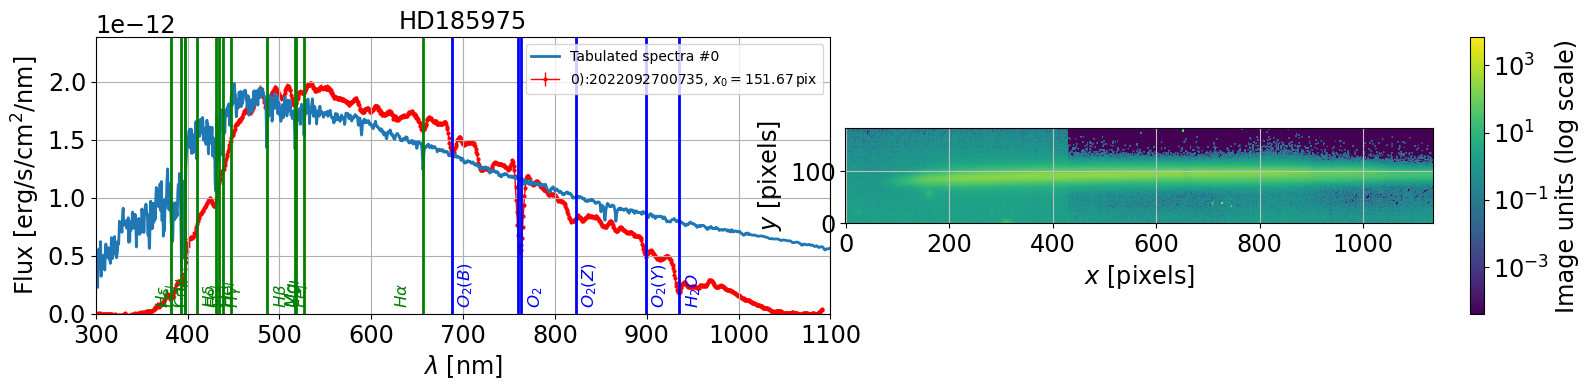

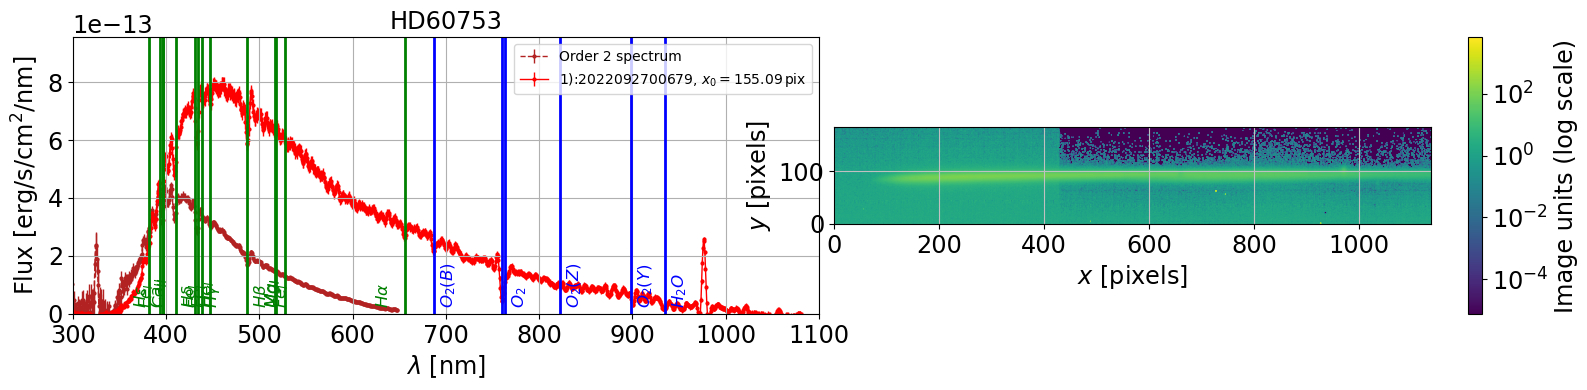

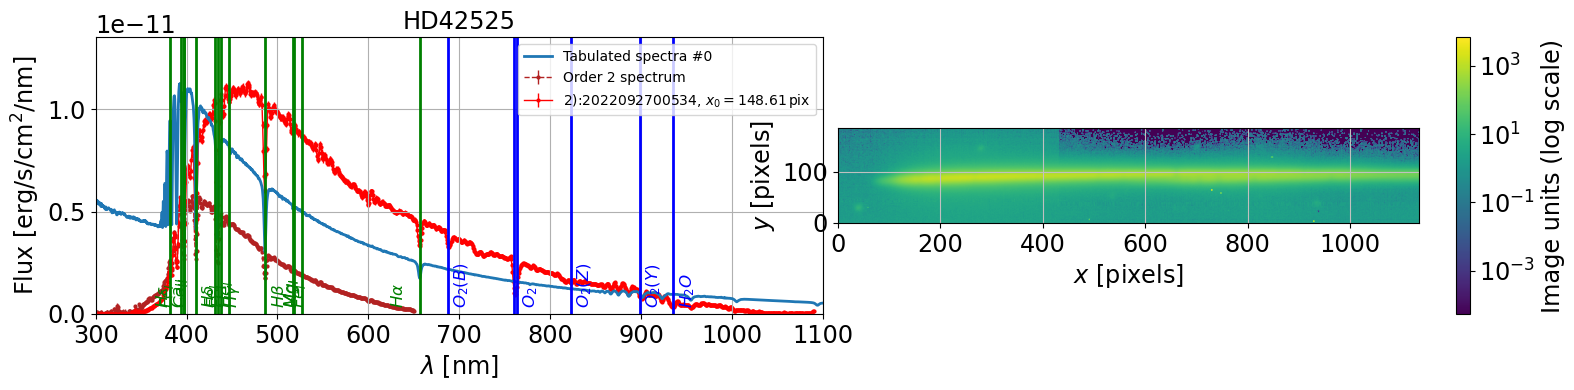

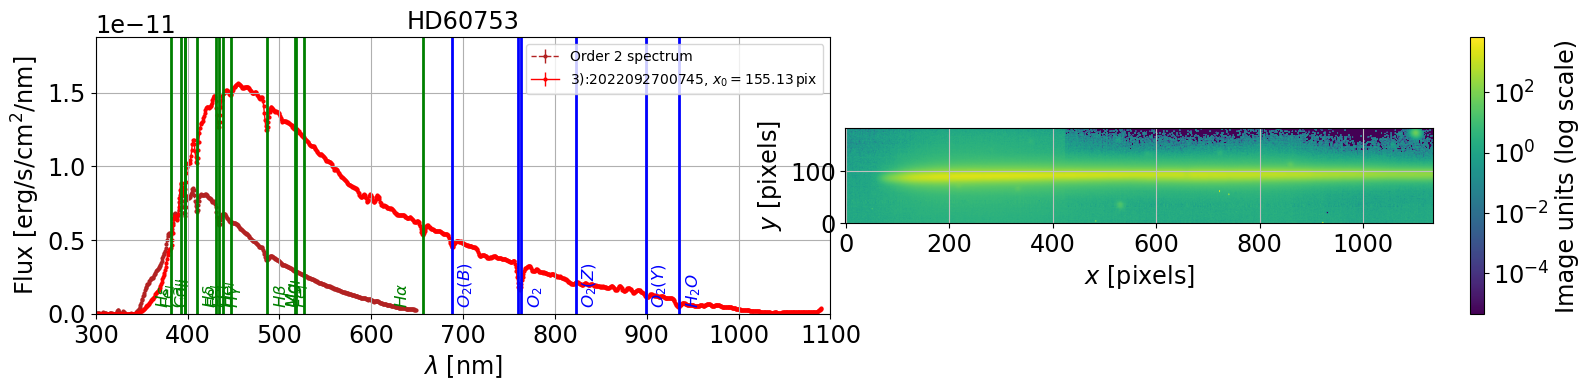

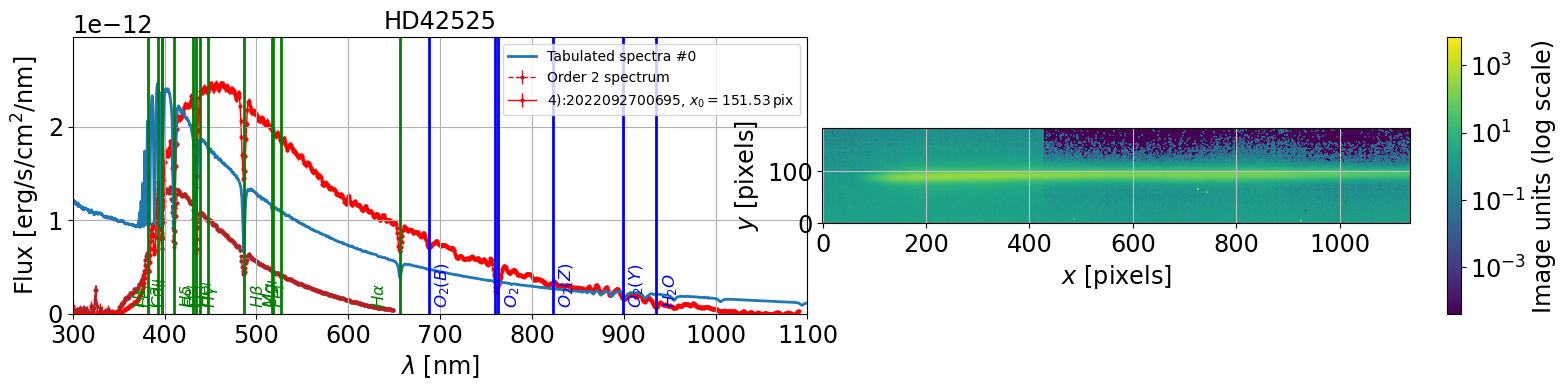

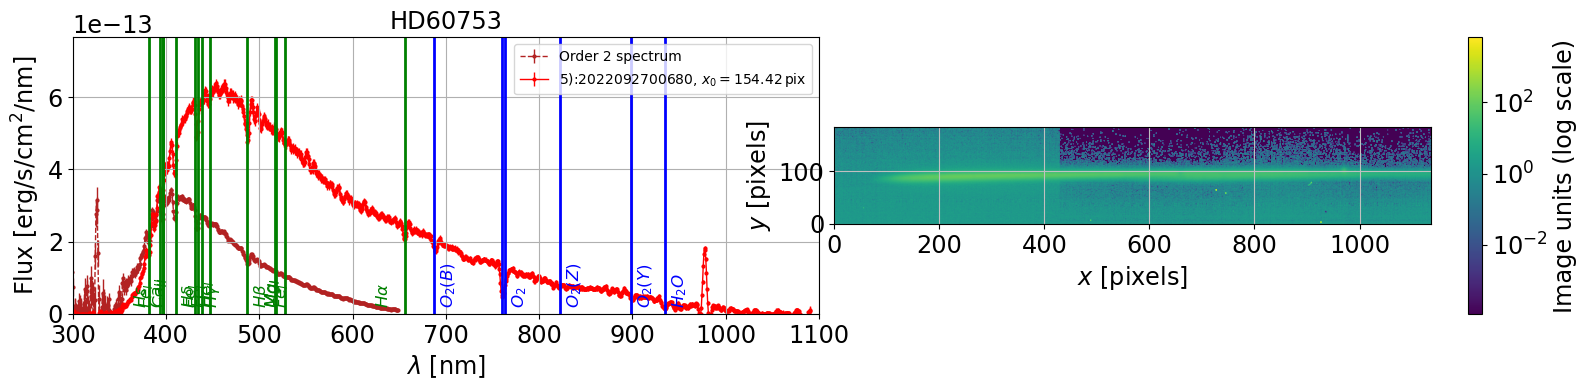

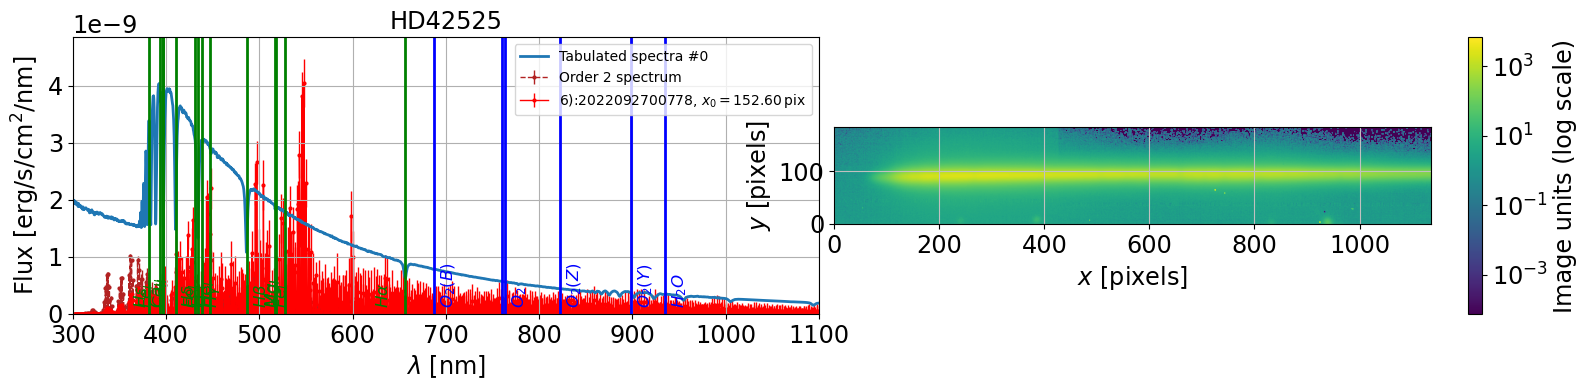

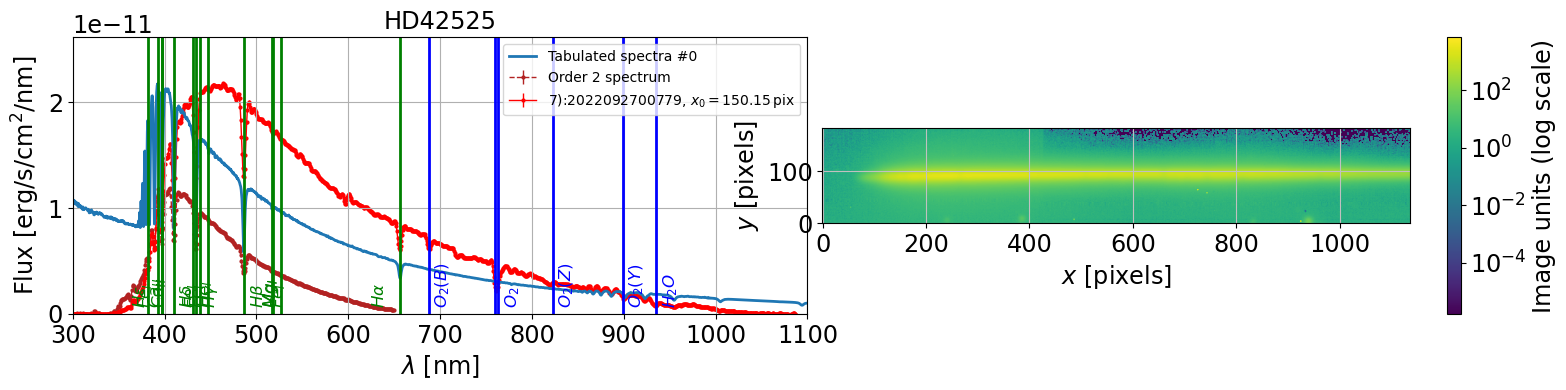

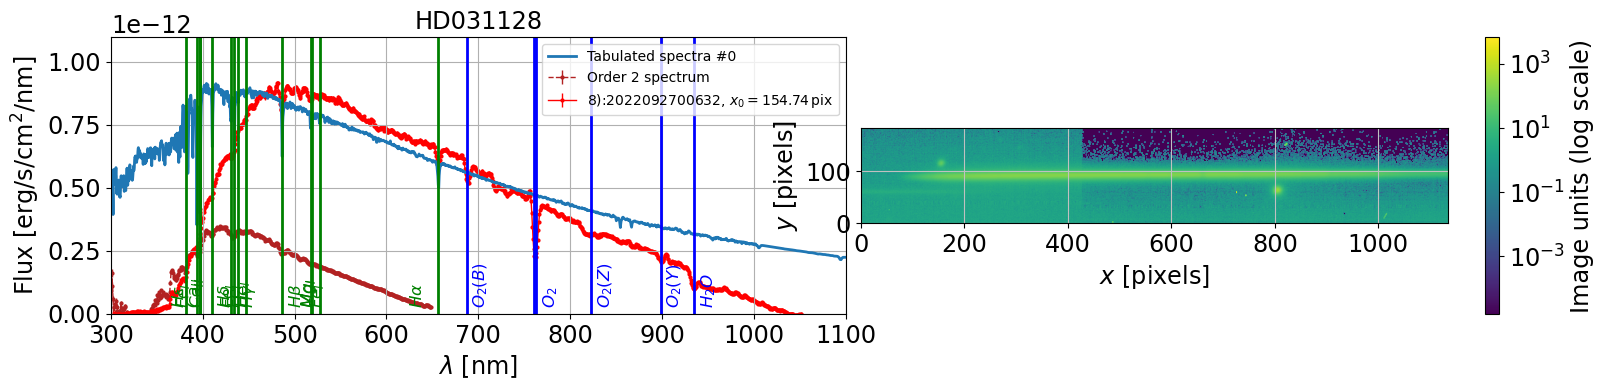

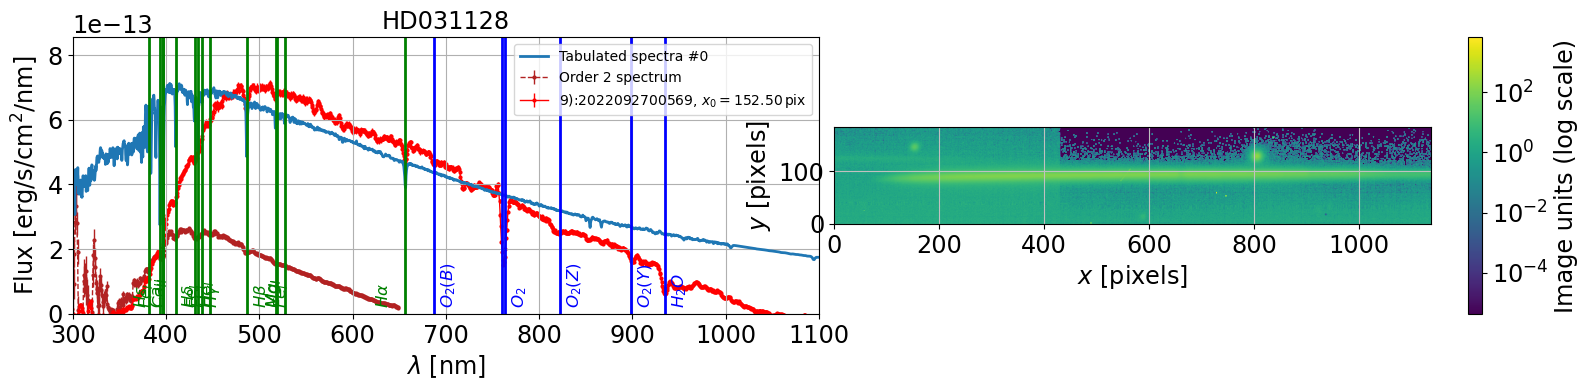

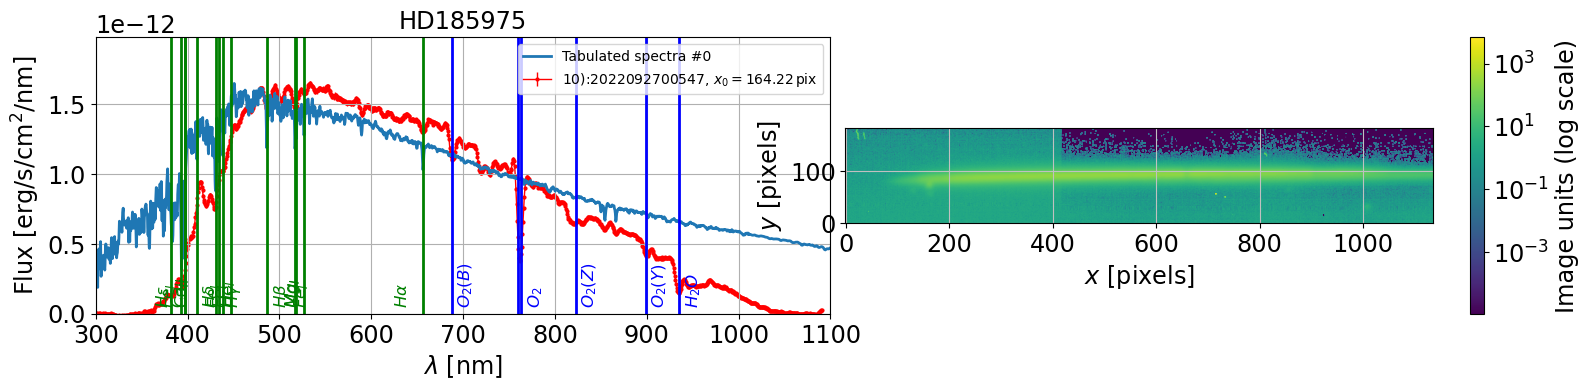

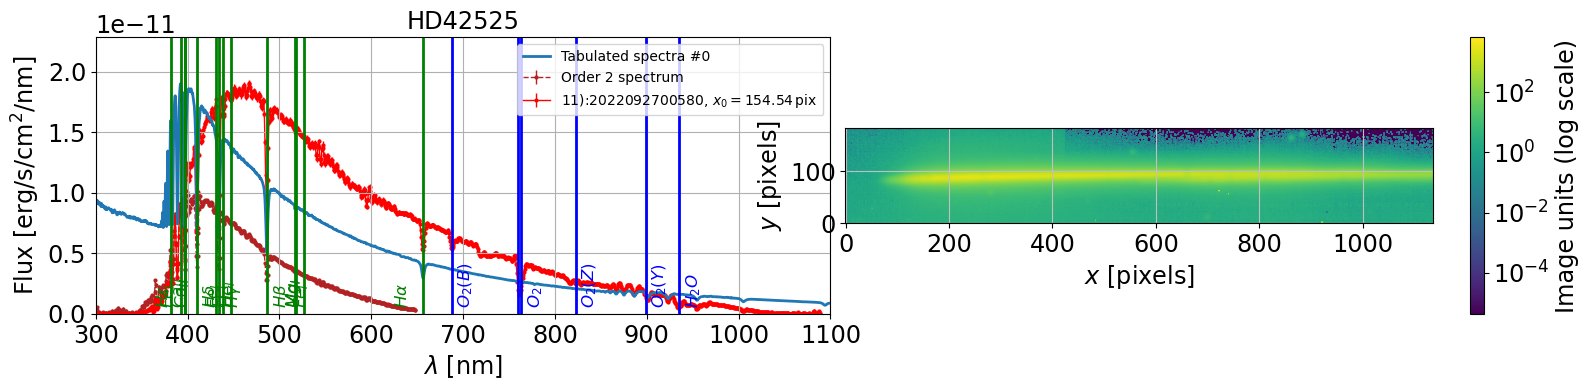

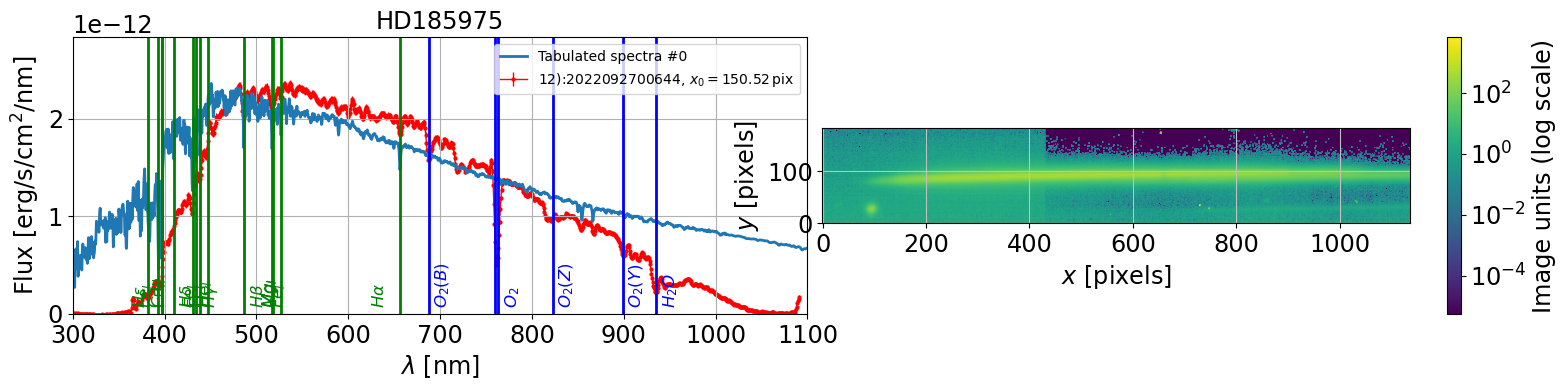

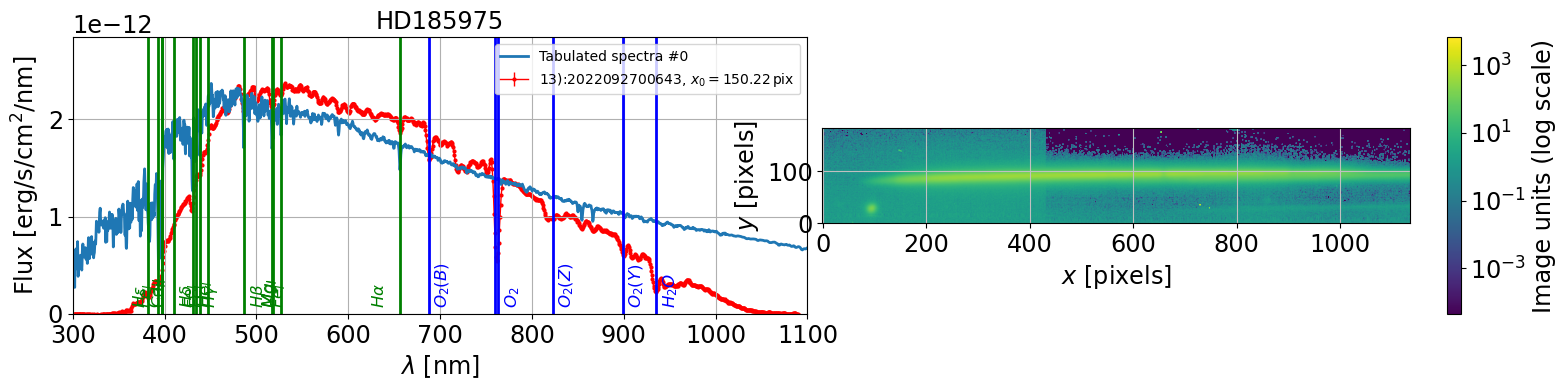

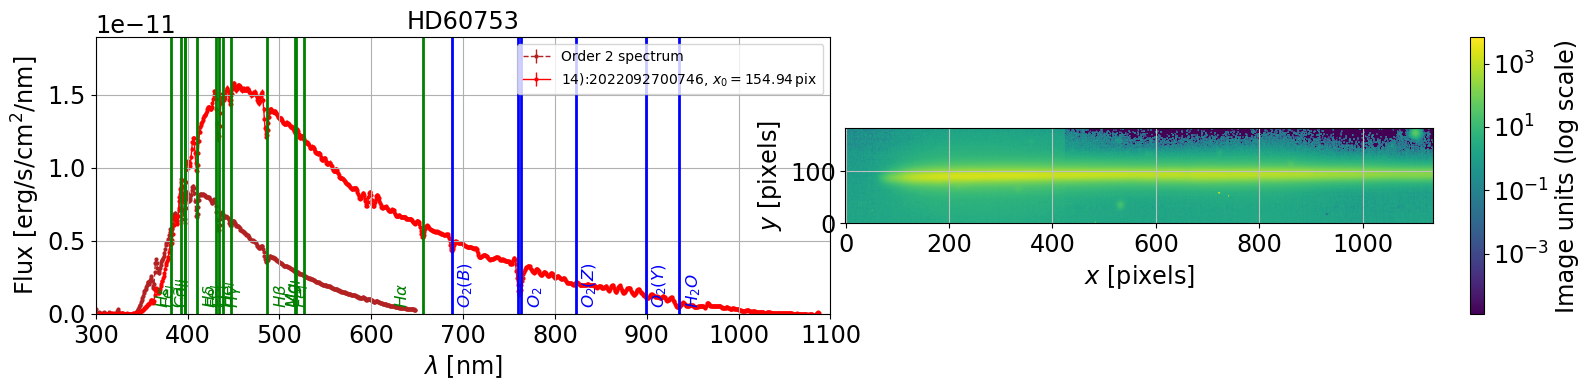

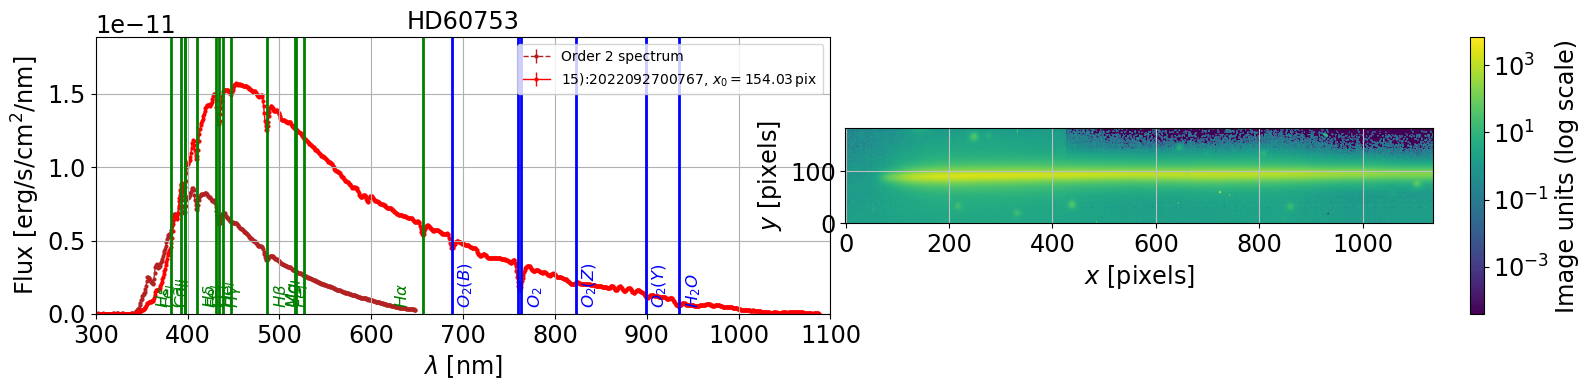

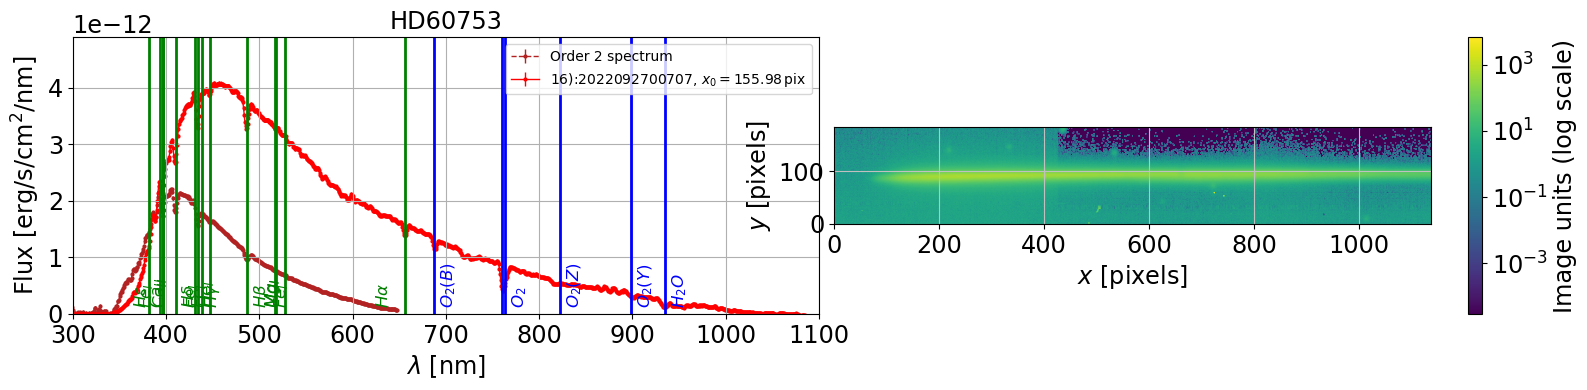

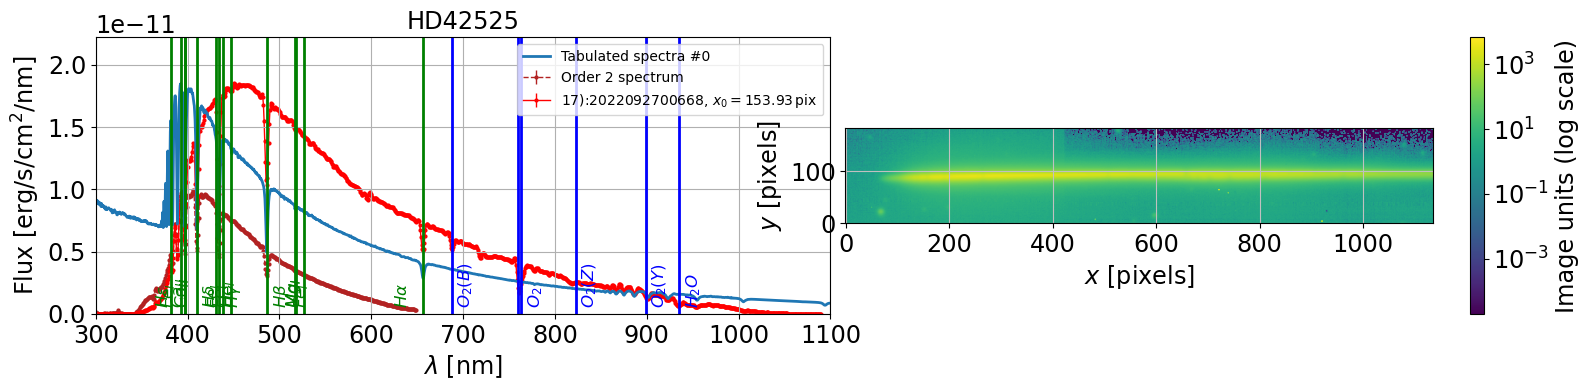

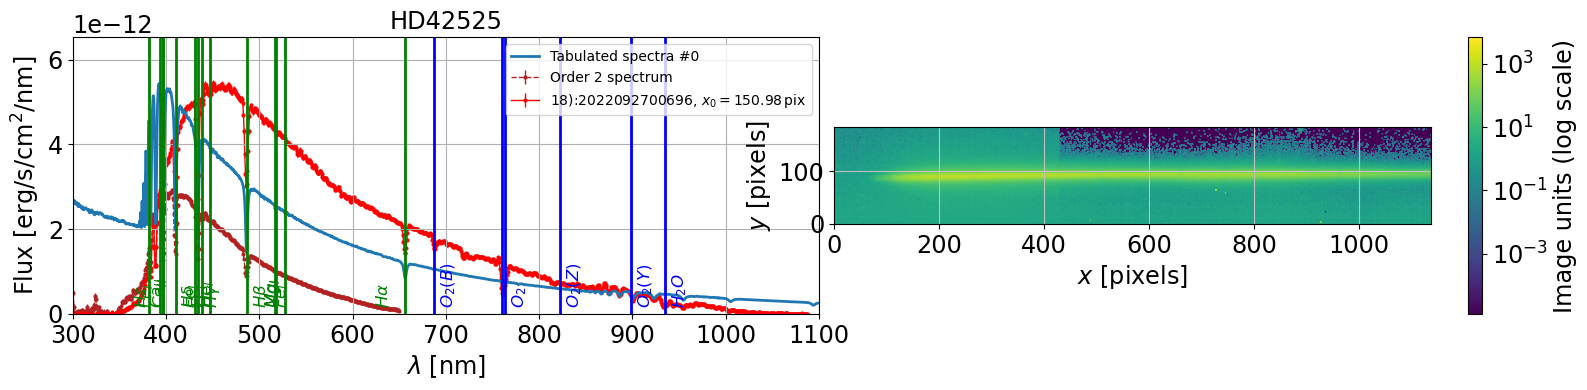

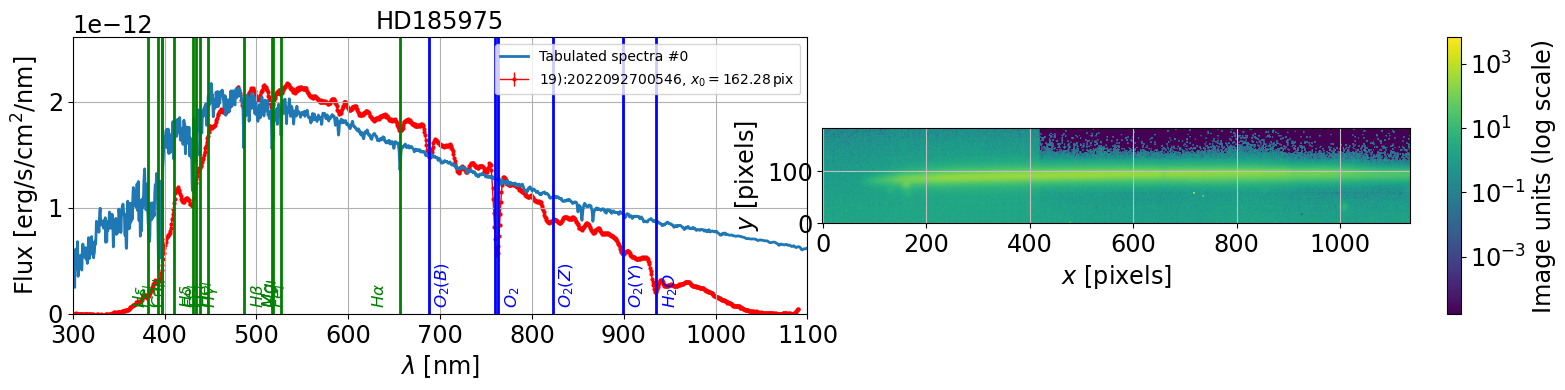

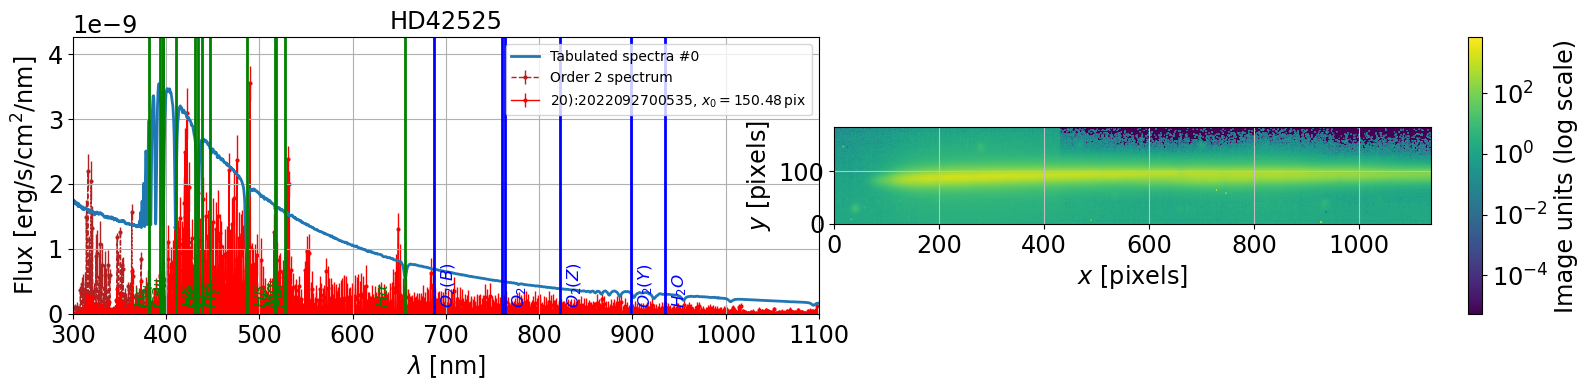

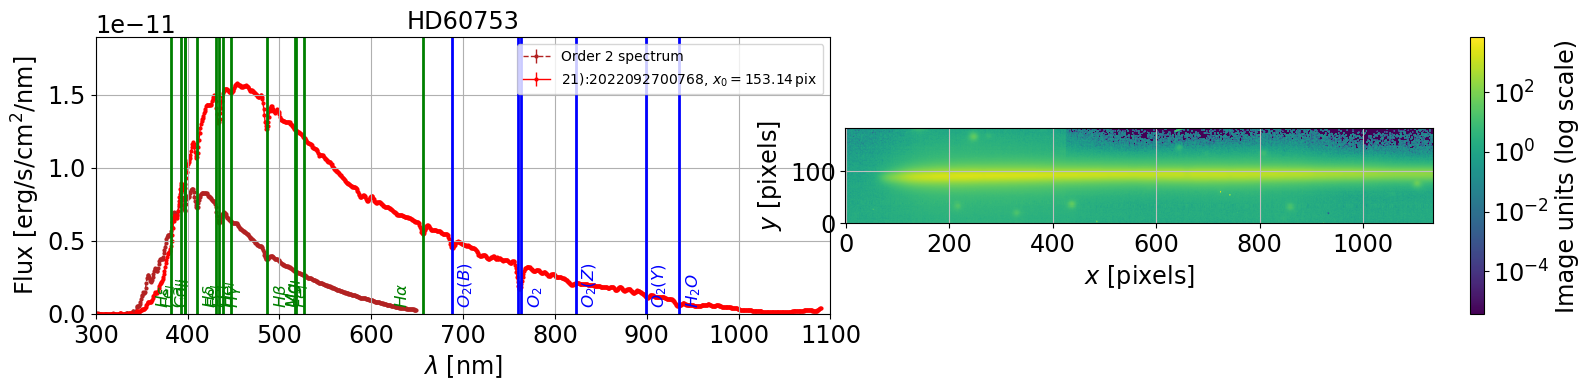

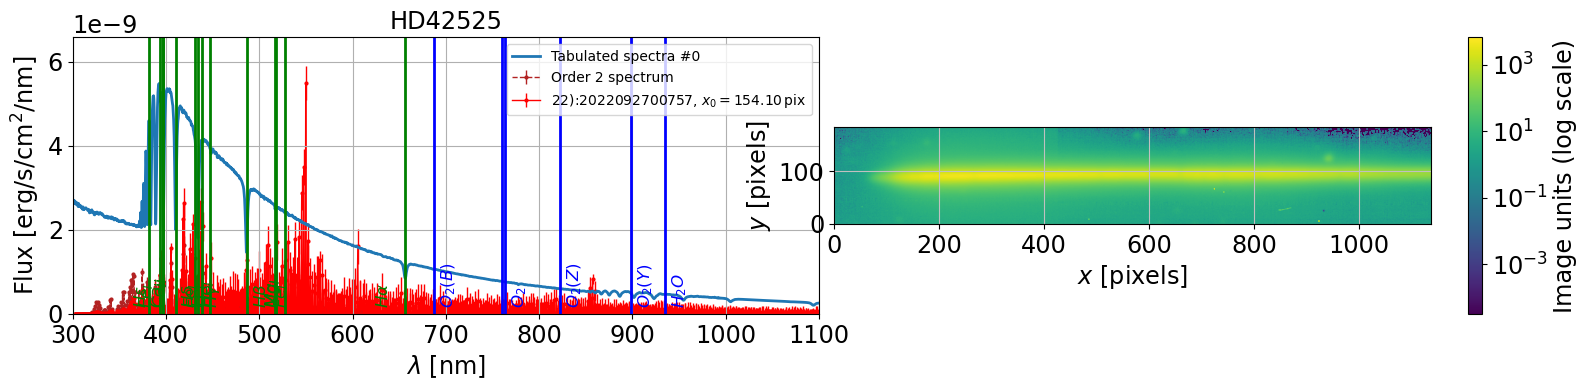

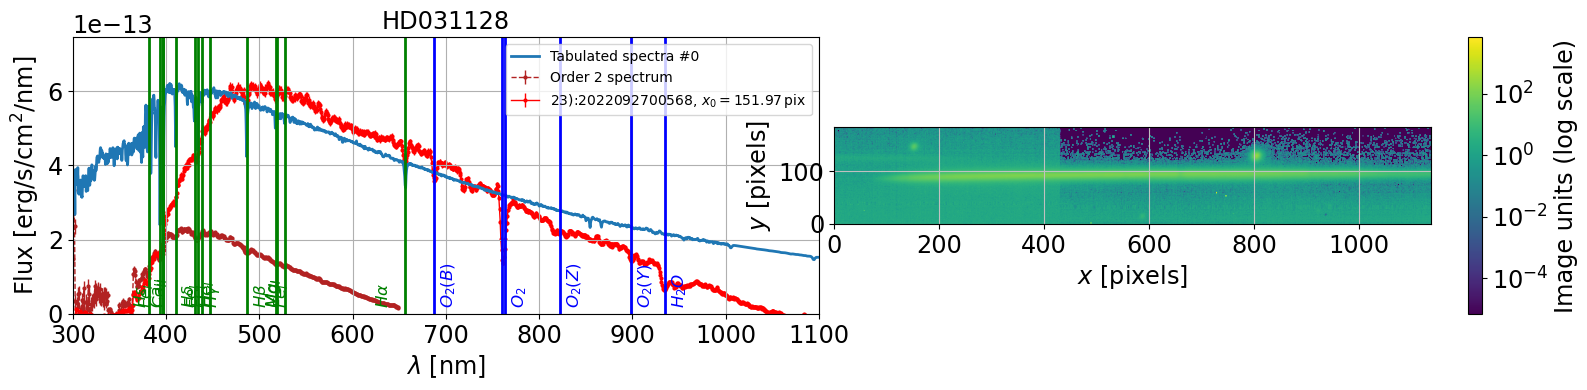

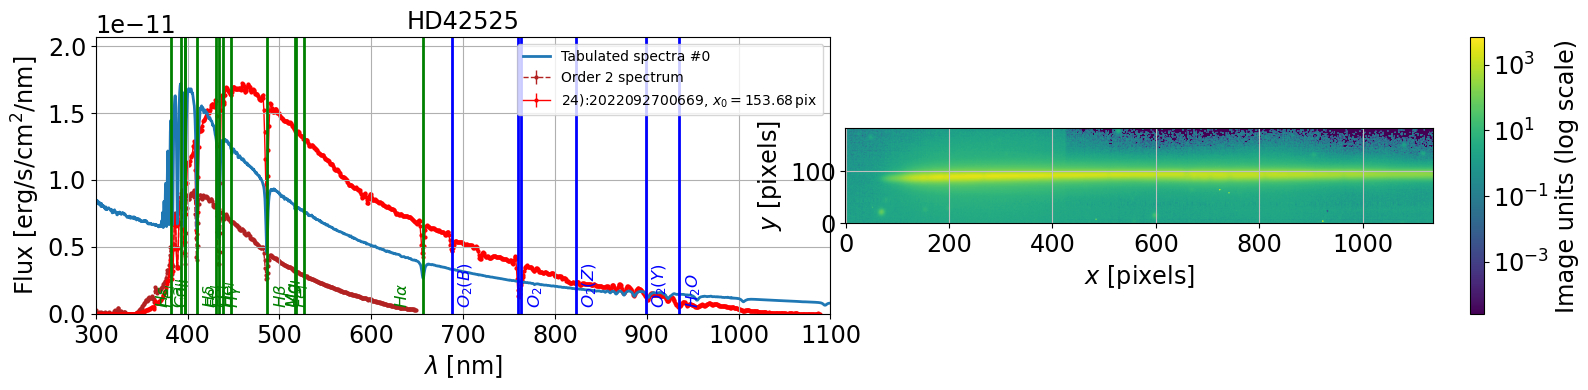

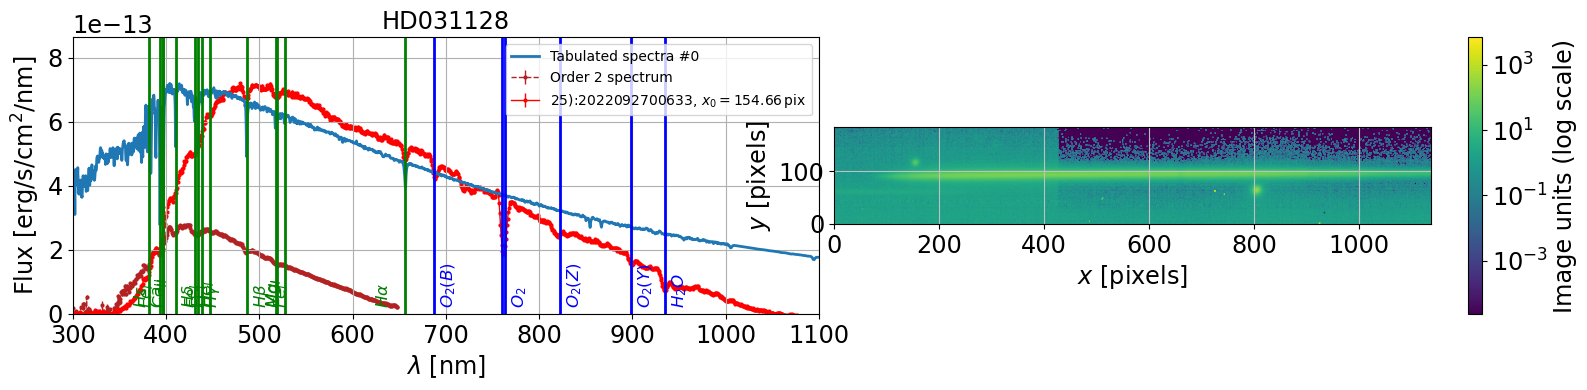

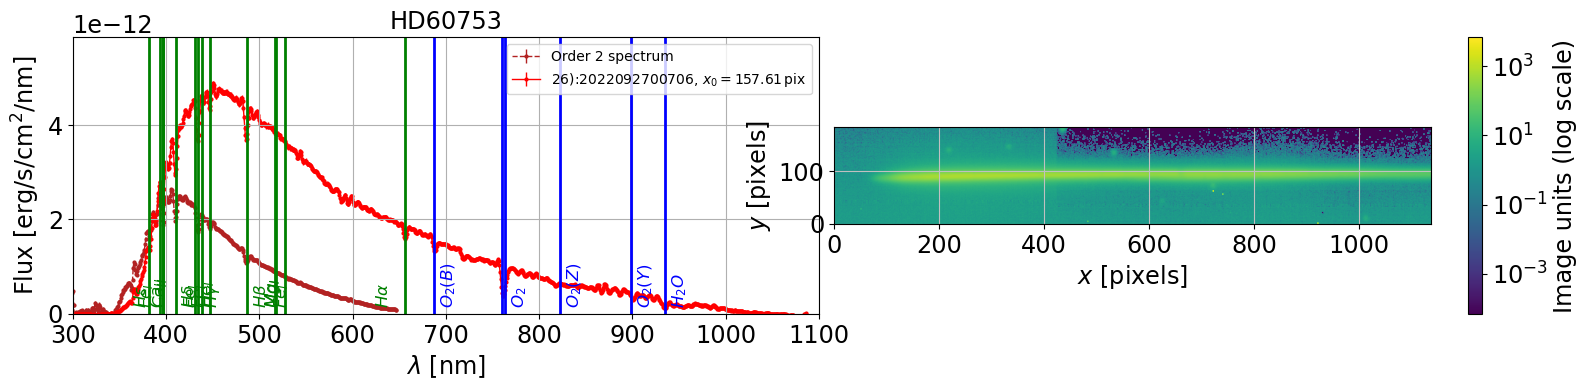

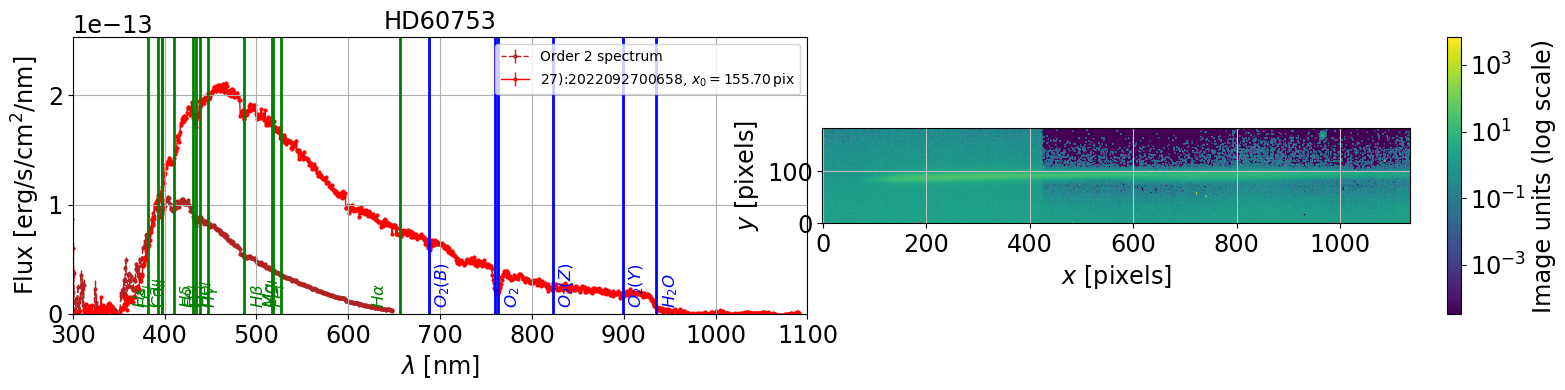

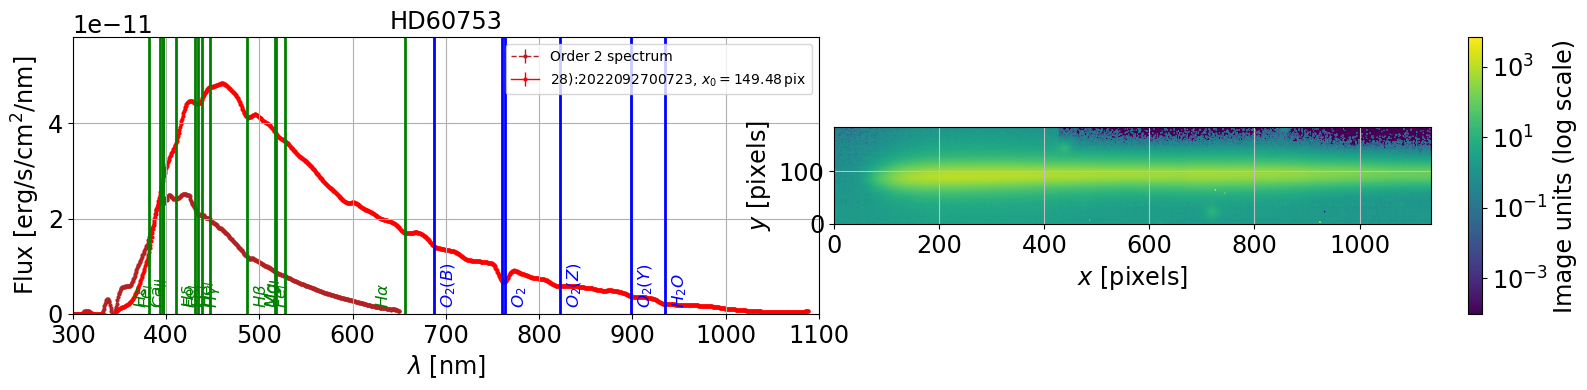

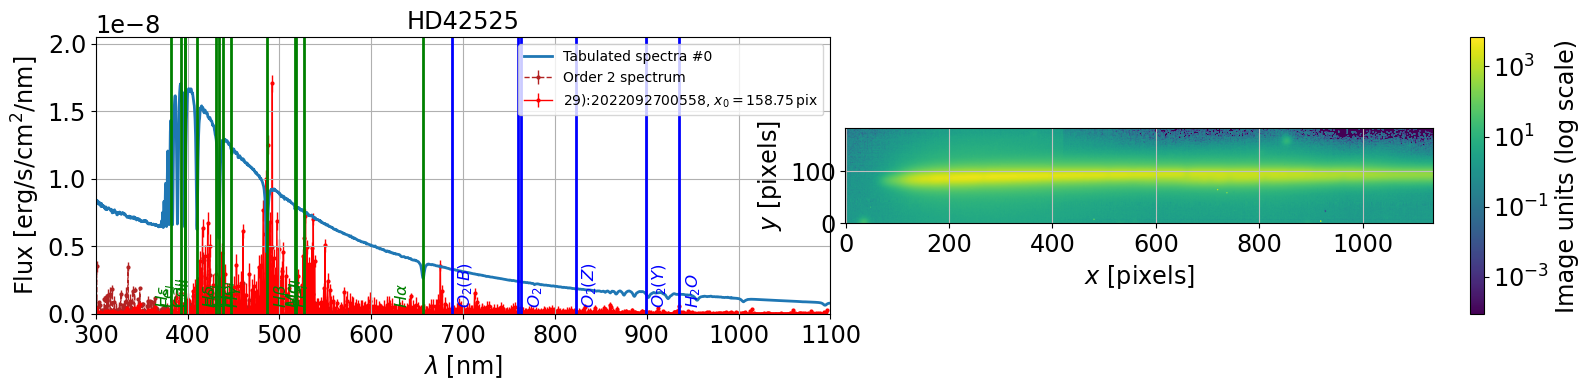

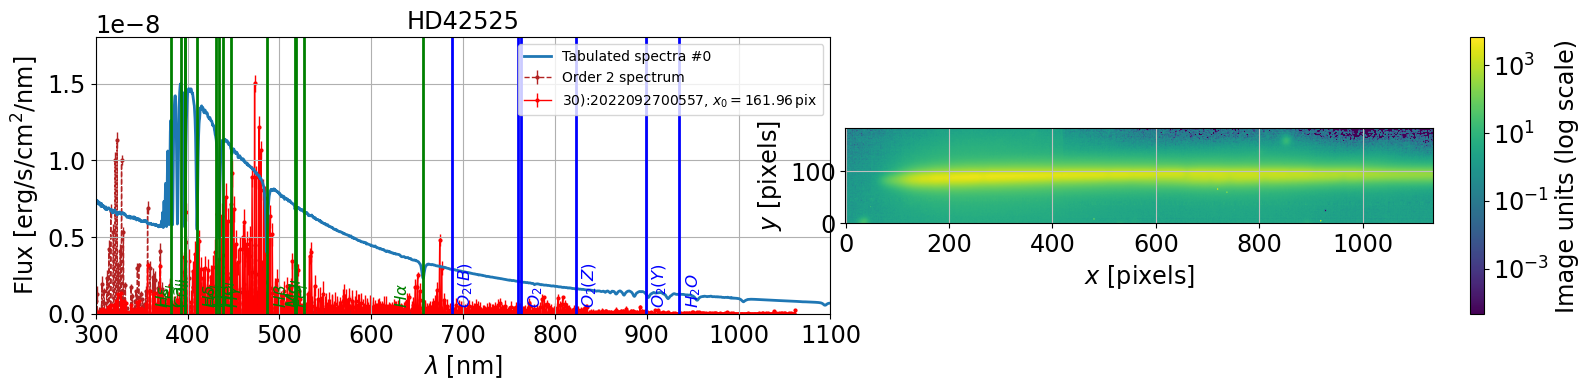

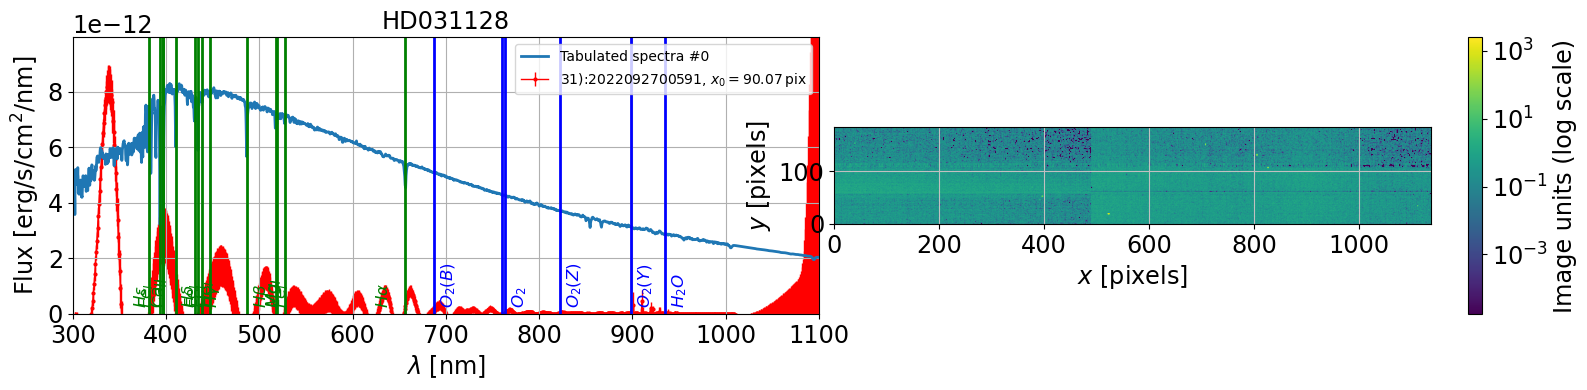

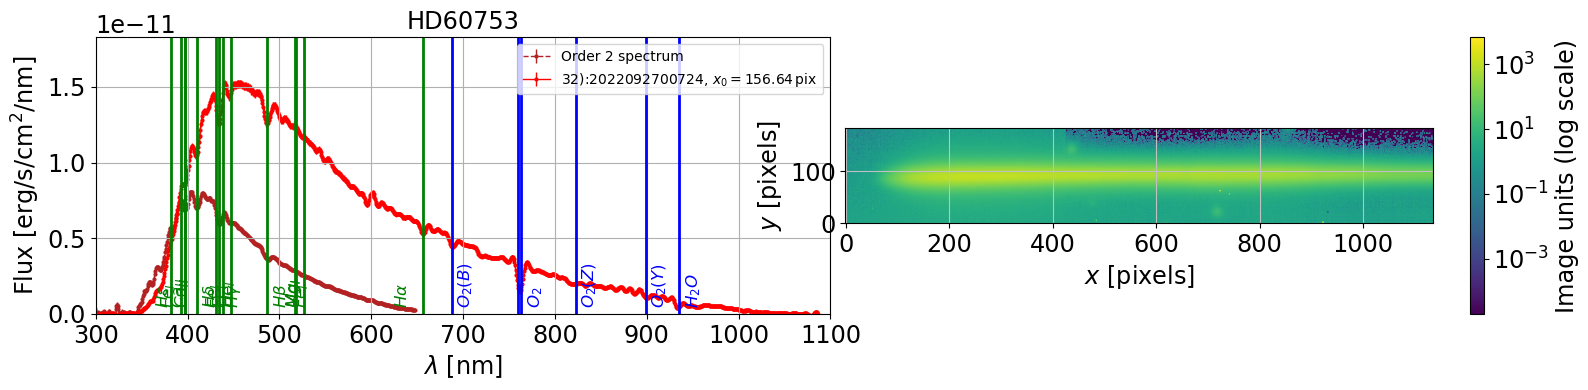

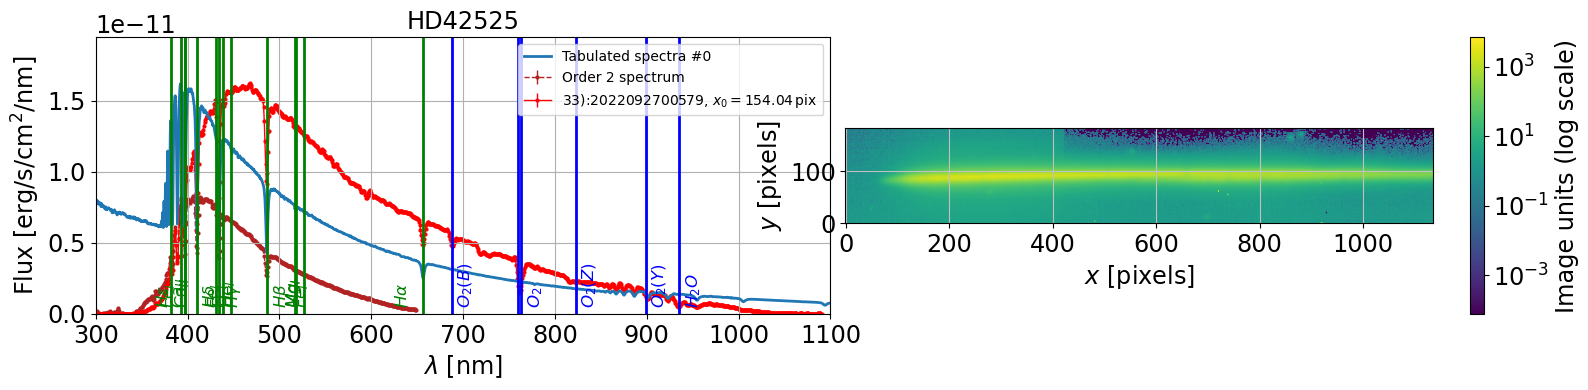

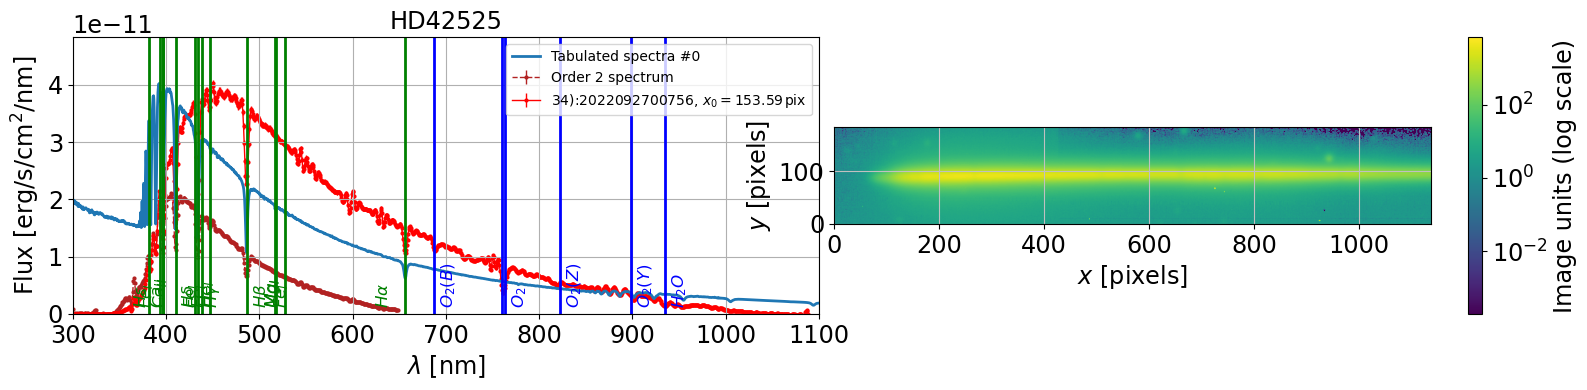

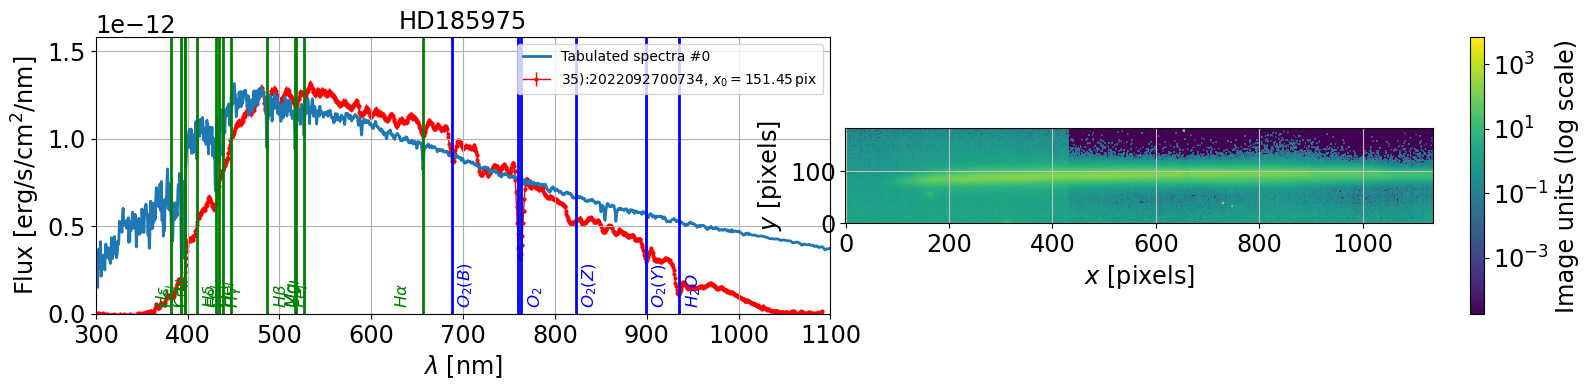

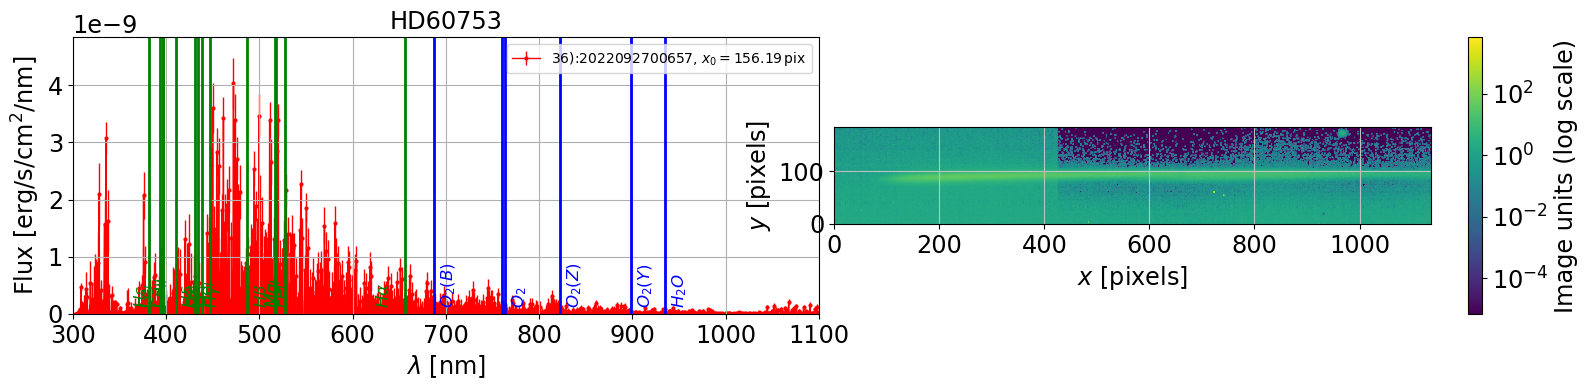

In [45]:
%matplotlib inline


infos = []
all_lambdas=[]
all_data=[]
all_data_err=[]


idx=0
for spec in all_spec:
    
    
    #s=spec.spectrum
    s=spec
    label = str(idx) +"):" + str(all_exposures[idx])
    
    try:
        fig=plt.figure(figsize=(16,4))
    
        ax1 = fig.add_subplot(1, 2, 1)
        s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    
        ax2 = fig.add_subplot(1, 2, 2)
        s.plot_spectrogram(ax=ax2,scale="log")
    
        all_lambdas.append(s.lambdas)
        all_data.append(s.data)
        all_data_err.append(s.err)
    
        #save info    
        infos.append([idx,s.target.label,s.date_obs,s.airmass,s.temperature,s.pressure,s.humidity])
            
    except Exception as inst:
        print(" >>> Exception catched for "+ label )
        print(type(inst))    # the exception instance
        print(inst.args)     # arguments stored in .args

    
    idx+=1

# Generate info

In [46]:
df_infos=pd.DataFrame(infos,columns=["idx","object","date_obs","airmass","temperature","pressure","humidity"])

In [47]:
df_infos.set_index('idx',inplace=True)

In [48]:
all_reftime=[ (Time(tt)-Time( df_infos["date_obs"].values[0])).to_value(u.hr) for tt in df_infos["date_obs"].values ]

In [49]:
all_reftime=np.array(all_reftime)

In [50]:
df_infos["reftime"]=all_reftime

In [51]:
NN = len(df_infos)

In [52]:
df_infos

object                        date_obs   airmass  temperature  \
idx                                                                    
0    HD185975  2022-09-28T08:45:13.622001236Z  2.052582            0   
1     HD60753  2022-09-28T07:40:02.063001063Z  1.548166            0   
2     HD42525  2022-09-28T05:17:00.004501045Z  1.830732            0   
3     HD60753  2022-09-28T08:52:00.647004990Z  1.277027            0   
4     HD42525  2022-09-28T08:18:08.058997308Z  1.310871            0   
5     HD60753  2022-09-28T07:40:45.056993206Z  1.544544            0   
6     HD42525  2022-09-28T09:14:13.478509620Z  1.254263            0   
7     HD42525  2022-09-28T09:14:56.469498850Z  1.253767            0   
8    HD031128  2022-09-28T07:04:36.300997130Z  1.123926            0   
9    HD031128  2022-09-28T05:40:22.798504495Z  1.420954            0   
10   HD185975  2022-09-28T05:25:29.532001588Z  1.922606            0   
11    HD42525  2022-09-28T05:47:55.068504865Z  1.691526            0   
12   HD185975  2022-09-28T07:13:10.320492047Z  1.991356            0   
13   HD185975  2022-09-28T07:12:27.319499621Z  1.990880            0   
14    HD60753  2022-09-28T08:52:43.673507007Z  1.275083            0   
15    HD60753  2022-09-28T09:06:48.195506621Z  1.239350            0   
16    HD60753  2022-09-28T08:26:10.996495353Z  1.355670            0   
17    HD42525  2022-09-28T07:32:44.018991607Z  1.385659            0   
18    HD42525  2022-09-28T08:18:51.090490865Z  1.309908            0   
19   HD185975  2022-09-28T05:24:46.622992156Z  1.922195            0   
20    HD42525  2022-09-28T05:17:42.818994862Z  1.827189            0   
21    HD60753  2022-09-28T09:07:31.005003069Z  1.237651            0   
22    HD42525  2022-09-28T09:00:03.411007340Z  1.265154            0   
23   HD031128  2022-09-28T05:39:39.890492431Z  1.424795            0   
24    HD42525  2022-09-28T07:33:26.833991252Z  1.384252            0   
25   HD031128  2022-09-28T07:05:19.112996492Z  1.122380            0   
26    HD60753  2022-09-28T08:25:28.079508385Z  1.358114            0   
27    HD60753  2022-09-28T07:26:10.615506623Z  1.622830            0   
28    HD60753  2022-09-28T08:37:00.324001320Z  1.320585            0   
29    HD42525  2022-09-28T05:32:51.092503150Z  1.755855            0   
30    HD42525  2022-09-28T05:32:08.277495328Z  1.759066            0   
31   HD031128  2022-09-28T05:55:26.489491419Z  1.346793            0   
32    HD60753  2022-09-28T08:37:43.135506228Z  1.318381            0   
33    HD42525  2022-09-28T05:47:11.873491883Z  1.694493            0   
34    HD42525  2022-09-28T08:59:20.588004498Z  1.265764            0   
35   HD185975  2022-09-28T08:44:30.712000547Z  2.052135            0   
36    HD60753  2022-09-28T07:25:27.791501149Z  1.626940            0   

     pressure  humidity   reftime  
idx                                
0           0         0  0.000000  
1           0         0 -1.086544  
2           0         0 -3.470449  
3           0         0  0.113063  
4           0         0 -0.451545  
5           0         0 -1.074601  
6           0         0  0.483293  
7           0         0  0.495235  
8           0         0 -1.677034  
9           0         0 -3.080784  
10          0         0 -3.328914  
11          0         0 -2.955154  
12          0         0 -1.534250  
13          0         0 -1.546195  
14          0         0  0.125014  
15          0         0  0.359604  
16          0         0 -0.317396  
17          0         0 -1.208223  
18          0         0 -0.439592  
19          0         0 -3.340833  
20          0         0 -3.458556  
21          0         0  0.371495  
22          0         0  0.247164  
23          0         0 -3.092703  
24          0         0 -1.196330  
25          0         0 -1.665141  
26          0         0 -0.329317  
27          0         0 -1.317502  
28          0         0 -0.137027  
29          0         0 -3.206258  
30          0         0 -3.218151  
31        

### Save info file

In [53]:
df_infos.to_csv(summary_file)